## Описание проекта

- Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение и подготовка данных из файла

### Чтение и просмотр файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()
df_games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Посмотрим значения в столбцах и есть ли среди них похожие.

In [5]:
df_games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Похожих нет

In [6]:
df_games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.2       2
1.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [7]:
df_games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Похожих нет

In [8]:
df_games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Похожих нет.

Самые популярные жанры Action и Sports          

In [9]:
df_games['Name'].value_counts()  

Need for Speed: Most Wanted         12
FIFA 14                              9
LEGO Marvel Super Heroes             9
Ratatouille                          9
Madden NFL 07                        9
                                    ..
ESPN International Track & Field     1
Crusaders of Might and Magic         1
Mercury Meltdown                     1
Monkey Mischief! Party Time          1
Jikkyou Powerful Pro Yakyuu 14       1
Name: Name, Length: 11559, dtype: int64

Видим, что есть игры с одним названием, но которые встречаются до 12 раз, это означает, что игра вышла на различных игровых платформах

Посмотрим процентное соотношение пропущенных значений и числовое

In [10]:
pd.DataFrame(df_games.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm') 

,0
Critic_Score,51.32
Rating,40.48
User_Score,40.09
Year_of_Release,1.61
Genre,0.01
Name,0.01
Other_sales,0
JP_sales,0
EU_sales,0
NA_sales,0


In [11]:
df_games.isnull().sum().sort_values(ascending=False)  

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Genre                 2
Name                  2
Other_sales           0
JP_sales              0
EU_sales              0
NA_sales              0
Platform              0
dtype: int64

В таблице видим 11 столбцов и 16715 строк. Есть не корректное название столбцов - есть заглавные буквы, в столбце Year_of_Release тип float, а нужен целый, в столбце User_Score тип не числовой. 

Внутри столбца также присутсвтвуют заглавные буквы. 
Пропуски есть в 6 столбцах. В genre и name по 2 пропуска - это скорее невнимательность при заполнении, так как они должны быть. В year_of_release 269 пропущенных значений - не внимательность при заполении, мало вероятно, что год издании нельзя было определить хотя бы примерно. Пропуски в столбцах user_score, critic_score, rating вызваны отсутствием рейтингов у игр, это вызвано как тем, что игры еще новые и рейтинг не посчитан/проставлен или игры старые и для них нет рейтинга.

### Предобработка данных

In [12]:
df_games.columns = df_games.columns.str.lower()             # изменили регистр в названии столбцов
df_games['name'] = df_games['name'].str.lower()             # изменили регистр в столбце
df_games['genre'] = df_games['genre'].str.lower()           # изменили регистр в столбце
df_games['platform'] = df_games['platform'].str.lower()     # изменили регистр в столбце
df_games['rating'] = df_games['rating'].str.lower()         # изменили регистр в столбце
df_games.info()    
df_games.head()                                             # проверяем что получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим правильность названия столбцов

In [13]:
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Название столбцов правильное

Проверим на дубликаты:

In [14]:
df_games.duplicated().sum()

0

Дубликатов нет.

Создаем новый столбец с суммарной продажей по всем регионам:

In [15]:
df_games['sum_sales'] = df_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Посмотрим количество tbd в пользовательской оценке

In [16]:
df_games[df_games['user_score'] == 'tbd']['user_score'].count()

2424

tbd эта аббревиатура и расшифровывается - To Be Determined, то есть "Будет определено". Источник: https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie

Для нашего проекта примем, что tbd == Nan, сделаем такую замену

In [17]:
df_games.loc[df_games['user_score'] == 'tbd','user_score'] = np.nan

Изменим тип данных на целый

In [18]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

In [19]:
df_games['user_score'] = df_games['user_score'].astype('float')

Ранее мы узнали, что у нас есть две игры с отсутствующим годом выпуска. Так как основные задания по проекту связаны с годами, удалим эти две игры, взять эти данные нам неоткуда.

Посмотрим игры с отсутствующими названиями:

In [20]:
df_games[df_games['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


У игр нет названия, жанра, оценок и рейтинга. Для целей проекта они бесполезны. Удалим их.

In [21]:
df_games.drop([659, 14244],inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
sum_sales          16713 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [22]:
df_games['name'] = df_games['name'].fillna('no_name')

In [23]:
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


Игр без жанра нет.

Пропуски в столбцах user_score, critic_score, rating большие и взять нам их негде (заполнить их по медиане или среднему будет не совсем корректной учитывая меняющиеся вкусы и пристрастия игроков и экспертов), заменим на число -10 (исходя из того, что столбцы числовые и значение 0 уже есть в user_score) и на no_rating в rating

In [24]:
df_games['user_score'] = df_games['user_score'].fillna('-10')

In [25]:
df_games['critic_score'] = df_games['critic_score'].fillna('-10')

In [26]:
df_games['rating'] = df_games['rating'].fillna('no_rating')

In [27]:
df_games.isnull().sum().sort_values(ascending=False)  

year_of_release    269
sum_sales            0
rating               0
user_score           0
critic_score         0
other_sales          0
jp_sales             0
eu_sales             0
na_sales             0
genre                0
platform             0
name                 0
dtype: int64

Осталось 269 пропусков в столбце год издания игры, эти данные взять неоткуда 

In [28]:
df_games[df_games['year_of_release'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94,8.5,e,5.24
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84,6.4,e,3.50
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74,7.9,e10+,3.06
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,-10,-10,no_rating,3.00
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,-10,-10,no_rating,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43,-10,e10+,0.01
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69,6.5,t,0.01
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59,6.7,m,0.01
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,-10,-10,no_rating,0.01


Видим, что есть название игр с годом.

Заменим пустые значения на 1111 год

In [29]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(value=1111)

In [30]:
df_games.isnull().sum().sort_values(ascending=False) 

sum_sales          0
rating             0
user_score         0
critic_score       0
other_sales        0
jp_sales           0
eu_sales           0
na_sales           0
genre              0
year_of_release    0
platform           0
name               0
dtype: int64

In [31]:
df_games['user_score'] = df_games['user_score'].astype('float')
df_games['critic_score'] = df_games['critic_score'].astype('int')
df_games.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


- В столбце у 2х игр с отсутствующим именем ввели имя 'no_name', у них же не было жанра игры, заполнили как 'no_genre'. 
- В user_score и critic_score пропуски заменили на '-10', в rating на 'no_rating', в столбце year_of_release пропуски заменили на 1111. 

Столбцы привели к необходимым типам данных, регистры в названии столбцов и содержании столбцов приведены к нижнему регистру.

## Исследовательский анализ данных

### Выпуск игр по годам

Исключим произведенную замену на 1111 из значений и получим сколько игр в какой год было выпущенно

In [32]:
year_of_release = df_games[df_games['year_of_release'] != 1111].pivot_table(index = 'year_of_release',
                                                                            values = 'name', aggfunc='count')
year_of_release.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


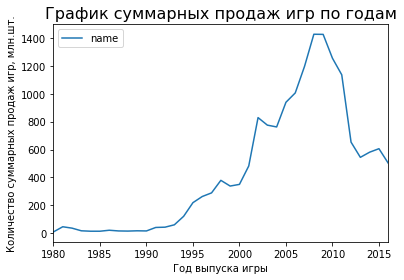

In [33]:
year_of_release.plot()
plt.title('График суммарных продаж игр по годам', size=16)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество суммарных продаж игр, млн.шт.');

По графику видим рост с 1992 года, до этого с 1980 года уровень выпускаемых игр был примерно на одном уровне. Самыми урожайными на новые релизы были 2007-2008 года. С 2013 года релиз новых игр находится на уровне с размахом 20%. 

### Продажа по платформам

In [34]:
platform_sales = df_games.pivot_table(index = 'platform', values = 'sum_sales',
                                      aggfunc='count').sort_values(by = 'sum_sales', ascending=False)
display(platform_sales.head(10))

,sum_sales
platform,
ps2,2161
ds,2151
ps3,1331
wii,1320
x360,1262
psp,1209
ps,1197
pc,974
xb,824


Получили сводную таблицу с суммарными продажами по платформам за все время. Видим, что наибольшие продажи были у верхних 7 платформ, с суммарными продажами более 1 млрд.копий. Выведем их отдельно

In [35]:
platform_sales_str = list(platform_sales.index[:7])
platform_sales_str

['ps2', 'ds', 'ps3', 'wii', 'x360', 'psp', 'ps']

In [36]:
platform_sales_loc = platform_sales.iloc[0:7]
display(platform_sales_loc.head(10))

,sum_sales
platform,
ps2,2161
ds,2151
ps3,1331
wii,1320
x360,1262
psp,1209
ps,1197


In [37]:
platform_sales_2 = df_games[df_games['year_of_release'] > 1990 ].merge(platform_sales_loc, on='platform', how='right')

In [38]:
display(platform_sales_2.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales_x,sum_sales_y
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54,1320
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52,1320
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77,1320
3,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e,28.91,1320
4,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,e,28.32,1320
5,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80,7.7,e,22.70,1320
6,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80,7.4,e,21.80,1320
7,super smash bros. brawl,wii,2008,fighting,6.62,2.55,2.66,1.01,93,8.9,t,12.84,1320
8,super mario galaxy,wii,2007,platform,6.06,3.35,1.20,0.74,97,8.9,e,11.35,1320
9,just dance 3,wii,2011,misc,5.95,3.11,0.00,1.06,74,7.8,e10+,10.12,1320


In [39]:
platform_sales_2_sum = platform_sales_2.pivot_table(index = ['platform', "year_of_release"],
                                                    values = 'sum_sales_x', aggfunc='sum')
display(platform_sales_2_sum.head(10))

platform_sales_2_sum.columns = ['sum_sales']
platform_sales_2_sum['years'] =  platform_sales_2_sum.index
platform_sales_2_sum['years'] = platform_sales_2_sum['years'].apply (lambda row: row[1]).astype('int')
display(platform_sales_2_sum.head(5))

sum_sales_x
platform year_of_release             
ds       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54

sum_sales  years
platform year_of_release                  
ds       2004                 17.27   2004
         2005                130.14   2005
         2006                119.81   2006
         2007                146.94   2007
         2008                145.31   2008

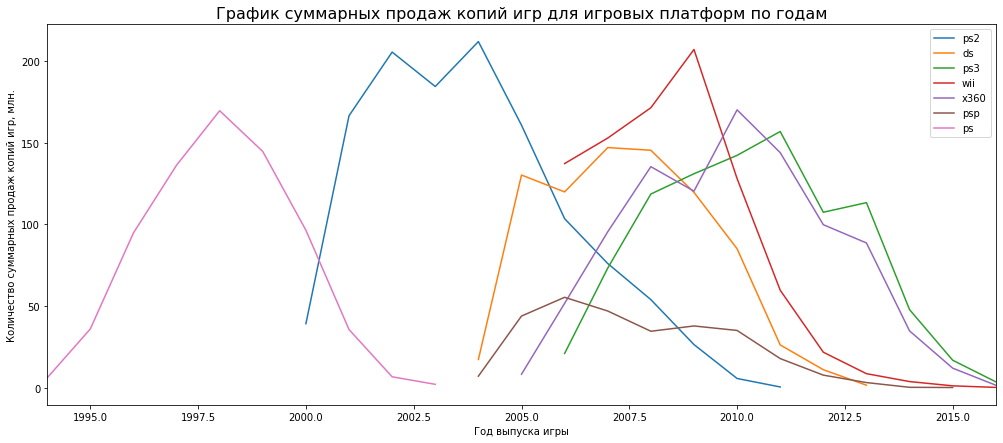

In [40]:
fig, ax = plt.subplots(figsize =(17,7))
for platform in platform_sales_str:
    platform_sales_2_sum.loc[platform].plot('years','sum_sales', ax=ax)
ax.legend(platform_sales_str,prop = {'size':10})
plt.title('График суммарных продаж копий игр для игровых платформ по годам', size=16)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество суммарных продаж копий игр, млн.');
plt.show();

По графикам видим, что характерный срок появления новой игровой платформы от одного производителя 6-7 лет, время жизни платформы 8-9 лет.

Также по графику видим, что все попавшие в него платформы уже отыграли свое и идут на спад и прогноз может быть - менять сферу бизнеса. Для построение прогноза нужно взять данные по продажам с 2013 года, скорее всего вышли новые платформы, но продажи по ним еще не такие большие и к нам они не попали.

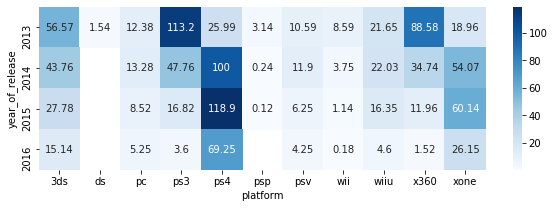

In [41]:
import seaborn as sns
platform_sales_pivot = df_games.query('year_of_release >= 2013').pivot_table(index = 'year_of_release', columns = 'platform', 
                  values = 'sum_sales', aggfunc = 'sum')

plt.figure(figsize = (10, 3))
sns.heatmap(platform_sales_pivot, annot = True, fmt='.4g', cmap = "Blues")
plt.show()

По тепловой карте видим темпы снижения продаж у разных платформ (хотя за 2016 год у нас и неполные данные). Сразу выделяется PS4,  в 2017 она будет точно жизнеспособна. Насчет PS3 есть сомнения, в 2013 она была заметным лидером, но произошло стремительное падение продаж. 3DS, PC, XOne и PSV неплохо держатся. Продажи снижаются, но без резких скачков.

### Выбор потенциально прибыльных платформ.

In [42]:
after_2017 = df_games[df_games['year_of_release'] >= 2015]
display(after_2017)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-10,-10.0,no_rating,14.63
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-10,-10.0,no_rating,7.98
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,e,7.60
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,-10,-10.0,no_rating,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,the longest 5 minutes,psv,2016,action,0.00,0.00,0.01,0.00,-10,-10.0,no_rating,0.01
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-10,-10.0,no_rating,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-10,-10.0,no_rating,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-10,-10.0,no_rating,0.01


In [43]:
platform_sales_2017 = after_2017.pivot_table(index = 'platform', values = 'sum_sales',
                                             aggfunc='sum').sort_values(by = 'sum_sales', ascending=False)
display(platform_sales_2017.head(10))

,sum_sales
platform,
ps4,188.15
xone,86.29
3ds,42.92
wiiu,20.95
ps3,20.42
pc,13.77
x360,13.48
psv,10.50
wii,1.32


Видим новые платформы.

In [44]:
platform_sales_2017_str = list(platform_sales_2017.index[:8])
platform_sales_2017_str

['ps4', 'xone', '3ds', 'wiiu', 'ps3', 'pc', 'x360', 'psv']

In [45]:
platform_sales_2017a = after_2017.pivot_table(index = ['platform', 'year_of_release'],
                                              values = 'sum_sales', aggfunc='count').sort_values(by = 'sum_sales',
                                                                                                 ascending=False)
display(platform_sales_2017a.head())

sum_sales
platform year_of_release           
ps4      2016                   164
         2015                   137
psv      2015                   110
xone     2016                    87
3ds      2015                    86

Видим, что самая популярная платформа по годовым продажам - PS. Для ближайшего конкурента в аналогочном году (в 2016 г.) было продано на 77 млн.штук экземпляров игр меньше.

In [46]:
platform_sales_2017a['years'] = platform_sales_2017a.index
platform_sales_2017a['years'] = platform_sales_2017a['years'].apply (lambda row: row[1]).astype('int')
display(platform_sales_2017a.head())

sum_sales  years
platform year_of_release                  
ps4      2016                   164   2016
         2015                   137   2015
psv      2015                   110   2015
xone     2016                    87   2016
3ds      2015                    86   2015

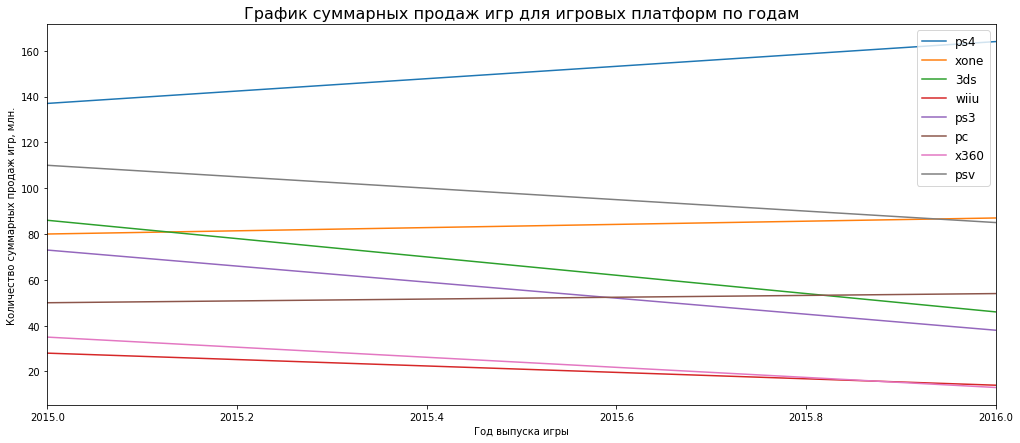

In [47]:
fig, ax = plt.subplots(figsize =(17,7))
for platform in platform_sales_2017_str:
    platform_sales_2017a.loc[platform].plot('years','sum_sales', ax=ax)
ax.legend(platform_sales_2017_str,prop = {'size':12})
plt.title('График суммарных продаж игр для игровых платформ по годам', size=16)
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество суммарных продаж игр, млн.');
plt.show();

По графику видим рост продаж у ps4, Xone и pc - они являются потенциально прибыльными платформами. Остальные платформы уже сходят на нет - это старые версии сейчас активно продающихся платформ.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

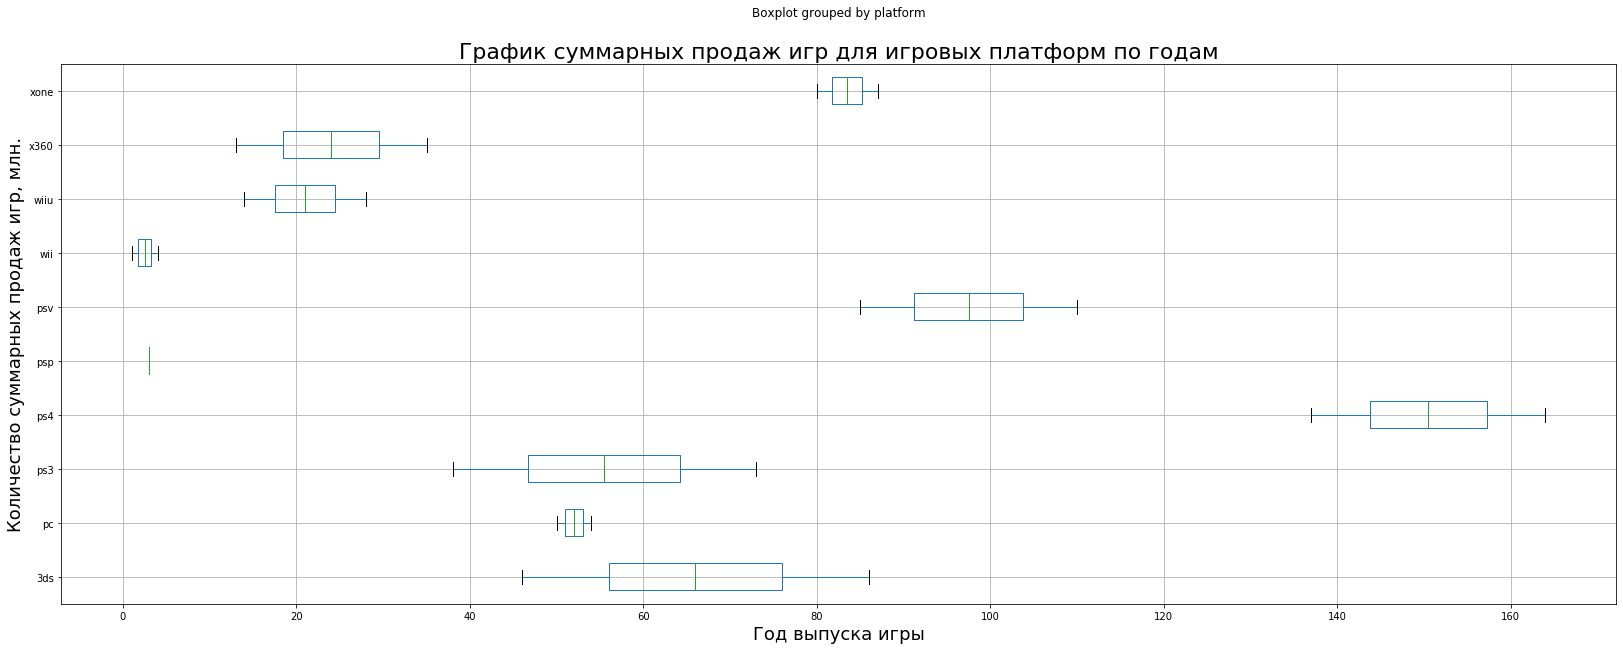

In [48]:
platform_sales_2017a.boxplot(column='sum_sales', by='platform', vert=False, figsize=(27,10))
plt.title('График суммарных продаж игр для игровых платформ по годам', size=22)
plt.xlabel('Год выпуска игры', size=18)
plt.ylabel('Количество суммарных продаж игр, млн.', size=18)
plt.show();

Четко видим, что основные продажи приходятся на PS4/PS3/PSV, 3ds и XOne. Абсолютным лидером является PS4.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

В качестве исследуемой платформы выберем PS4.

In [49]:
ps4 = after_2017[after_2017['user_score'] >= 0]                      # убирем наши замены на -10
ps4_2 = ps4[ps4['critic_score'] >= 0]                                # убирем наши замены на -10
ps4_pure = ps4_2[ps4_2['platform']=='ps4']                           # оставим платформу ps4
print("Корреляция оценки пользователей и суммарных продаж:", ps4_pure['user_score'].corr(ps4_pure['sum_sales'])) 
# посчитали корреляцию общих продаж и пользовательского рейтинга
print("Корреляция оценки критиков и суммарных продаж:", ps4_pure['critic_score'].corr(ps4_pure['sum_sales'])) 

Корреляция оценки пользователей и суммарных продаж: -0.06436843081030288
Корреляция оценки критиков и суммарных продаж: 0.3920741369660568


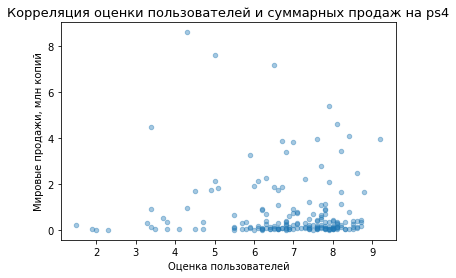

In [50]:
ps4_pure.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки пользователей и суммарных продаж на ps4', size=13)
plt.xlabel('Оценка пользователей')
plt.ylabel('Мировые продажи, млн копий')
plt.show()

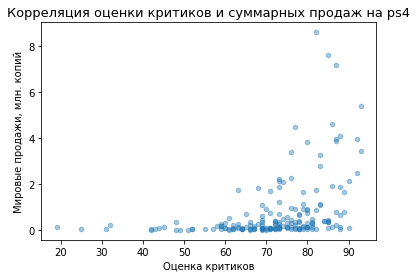

In [51]:
ps4_pure.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки критиков и суммарных продаж на ps4', size=13)
plt.xlabel('Оценка критиков')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

Видим, что на продажи большое влияние оказывают оценки критиков (0.39). Оценки пользователей влияние не оказывает (-0.06).

### Соотнесите выводы с продажами игр на других платформах

В качестве платформ для сравнения выберем pc, wiiu и xone.

- Платформа pc

In [52]:
platform_pc = ps4_2[ps4_2['platform']=='pc']    
print("Корреляция оценки пользователей и суммарных продаж на платформе PC:",
      platform_pc['user_score'].corr(platform_pc['sum_sales']))     # считаем корреляцию общих продаж и user_score
print("Корреляция оценки критиков и суммарных продаж на платформе PC:",
      platform_pc['critic_score'].corr(platform_pc['sum_sales'])) 

Корреляция оценки пользователей и суммарных продаж на платформе PC: 0.14031210542891726
Корреляция оценки критиков и суммарных продаж на платформе PC: 0.3773317477241351


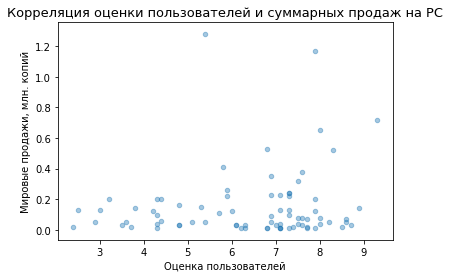

In [53]:
platform_pc.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки пользователей и суммарных продаж на PC', size=13)
plt.xlabel('Оценка пользователей')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

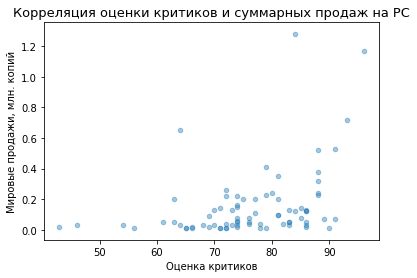

In [54]:
platform_pc.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки критиков и суммарных продаж на PC', size=13)
plt.xlabel('Оценка критиков')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

- Платформа wiiu

In [55]:
platform_wiiu = ps4_2[ps4_2['platform']=='wiiu']  
print("Корреляция оценки пользователей и суммарных продаж на платформе WIIU:", 
      platform_wiiu['user_score'].corr(platform_wiiu['sum_sales']))   # считаем корреляцию общих продаж и user_score
print("Корреляция оценки критиков и суммарных продаж на платформе WIIU:",
      platform_wiiu['critic_score'].corr(platform_wiiu['sum_sales'])) 

Корреляция оценки пользователей и суммарных продаж на платформе WIIU: 0.3549869655260603
Корреляция оценки критиков и суммарных продаж на платформе WIIU: 0.32567420650305284


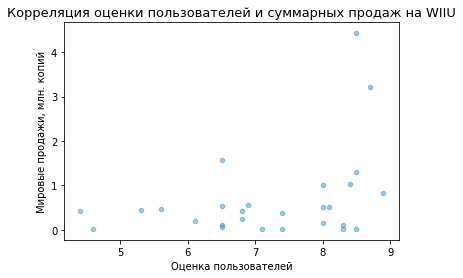

In [56]:
platform_wiiu.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки пользователей и суммарных продаж на WIIU', size=13)
plt.xlabel('Оценка пользователей')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

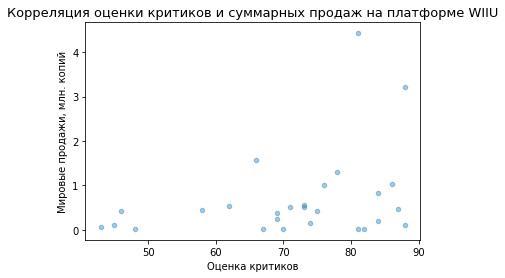

In [57]:
platform_wiiu.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки критиков и суммарных продаж на платформе WIIU', size=13)
plt.xlabel('Оценка критиков')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

- Платформа Xone

In [58]:
platform_xone = ps4_2[ps4_2['platform']=='xone']     
print("Корреляция оценки пользователей и суммарных продаж на платформе xone:", 
      platform_xone['user_score'].corr(platform_xone['sum_sales']))     # считаем корреляцию общих продаж и user_score
print("Корреляция оценки критиков и суммарных продаж на платформе xone:",
      platform_xone['critic_score'].corr(platform_xone['sum_sales'])) 

Корреляция оценки пользователей и суммарных продаж на платформе xone: -0.06868389218473443
Корреляция оценки критиков и суммарных продаж на платформе xone: 0.4225192624742895


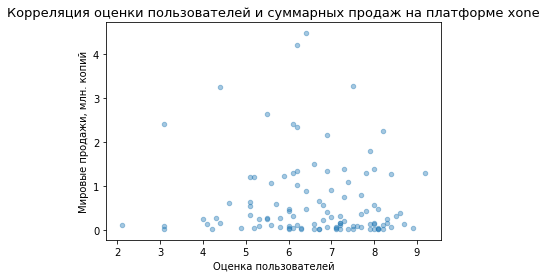

In [59]:
platform_xone.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки пользователей и суммарных продаж на платформе xone', size=13)
plt.xlabel('Оценка пользователей')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

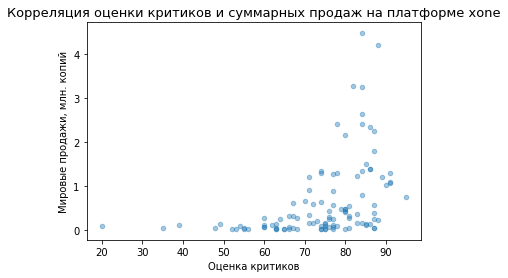

In [60]:
platform_xone.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4)
plt.title('Корреляция оценки критиков и суммарных продаж на платформе xone', size=13)
plt.xlabel('Оценка критиков')
plt.ylabel('Мировые продажи, млн. копий')
plt.show()

In [61]:
print("Корреляция оценки пользователей и суммарных продаж на платформе PS4:", 
      ps4_pure['user_score'].corr(ps4_pure['sum_sales']))     # считаем корреляцию общих продаж и пользовательского рейтинга
print("Корреляция оценки критиков и суммарных продаж на платформе PS4:", 
      ps4_pure['critic_score'].corr(ps4_pure['sum_sales'])) 
print()
print("Корреляция оценки пользователей и суммарных продаж на платформе PC:", 
      platform_pc['user_score'].corr(platform_pc['sum_sales']))     # считаем корреляцию общих продаж и user_score
print("Корреляция оценки критиков и суммарных продаж на платформе PC:",
      platform_pc['critic_score'].corr(platform_pc['sum_sales'])) 
print()
print("Корреляция оценки пользователей и суммарных продаж на платформе WIIU:", 
      platform_wiiu['user_score'].corr(platform_wiiu['sum_sales']))    
print("Корреляция оценки критиков и суммарных продаж на платформе WIIU:",
      platform_wiiu['critic_score'].corr(platform_wiiu['sum_sales'])) 
print()
print("Корреляция оценки пользователей и суммарных продаж на платформе xone:", 
      platform_xone['user_score'].corr(platform_xone['sum_sales']))     # считаем корреляцию общих продаж и user_score
print("Корреляция оценки критиков и суммарных продаж на платформе xone:",
      platform_xone['critic_score'].corr(platform_xone['sum_sales'])) 

Корреляция оценки пользователей и суммарных продаж на платформе PS4: -0.06436843081030288
Корреляция оценки критиков и суммарных продаж на платформе PS4: 0.3920741369660568

Корреляция оценки пользователей и суммарных продаж на платформе PC: 0.14031210542891726
Корреляция оценки критиков и суммарных продаж на платформе PC: 0.3773317477241351

Корреляция оценки пользователей и суммарных продаж на платформе WIIU: 0.3549869655260603
Корреляция оценки критиков и суммарных продаж на платформе WIIU: 0.32567420650305284

Корреляция оценки пользователей и суммарных продаж на платформе xone: -0.06868389218473443
Корреляция оценки критиков и суммарных продаж на платформе xone: 0.4225192624742895


Видим, что самая большая корреляция от оценки критиков и продаж на платформе xone 0.42
           самая низкая корреляция от оценки критиков и продаж на платформе wiiu 0.32
           
Видим, что самая большая корреляция от оценки пользователей и продаж на платформе wiiu 0.35
           самая низкая корреляция от оценки критиков и продаж на платформе xone - 0.068
           
Игровая платформа wiiu, из платформ, которые мы рассмотрели, максимально приближена к балансу по корреляции оценок критиков и пользователей к суммарным продажам. На остальных платформах влияние оценок пользователей слабое.

В этом пункте мы должны учесть, что корреляция оценок критиков с продажами может не иметь предсказательной силы. Возможно, игры были положительно оценены критиками, когда стало известно о коммерческом успехе игры. К сожалению, на наших данных мы не можем никак проверить, как и когда были собраны данные.

### Общие распределение игр по жанрам

In [62]:
after_2017['genre'].value_counts() # посмотрим на количество игр по жанрам в периоде с 2015-2016 год

action          431
role-playing    132
adventure       110
sports          107
shooter          81
misc             71
racing           42
fighting         37
simulation       33
strategy         29
platform         28
puzzle            7
Name: genre, dtype: int64

In [63]:
genre_sales_2017a = after_2017.pivot_table(index = ['genre'], 
                                           values = 'sum_sales', aggfunc='sum').sort_values(by = 'sum_sales', ascending=False)
display(genre_sales_2017a.head(5))     # посмотрим количество проданных копий по жанрам за 2015-2016 года

,sum_sales
genre,
shooter,105.73
action,102.13
sports,64.33
role-playing,55.82
misc,14.17


In [64]:
genre_sales_2017a.describe()

,sum_sales
count,12.000000
mean,33.160000
std,38.655059
min,0.720000
25%,8.847500
50%,12.175000
75%,57.947500
max,105.730000


In [65]:
genre_2017 = after_2017.pivot_table(index = 'genre', 
                                    values = (['sum_sales','name']), 
                                    aggfunc= (['sum', 'count'])).sort_values(('sum', 'sum_sales'), ascending=False)
display(genre_2017.head(5))     # посмотрим по годам релиз игр по жанрам

sum count          
             sum_sales  name sum_sales
genre                                 
shooter         105.73    81        81
action          102.13   431       431
sports           64.33   107       107
role-playing     55.82   132       132
misc             14.17    71        71

- Видим, что максимальные продажи показывают жанры shooter (105.73 млн.копий), action	(102.13 млн.копий) и sports (64.33 млн.копий), в тоже время по количеству игр лидирует жанр action (431 игры), role-playing (132 игры) и adventure (110 игры).
- Рассматривая сводную таблицу по суммарным продажам и количеству игр видим, что жанр shooter самый прибыльный (105.73 млн.копий на 81 игру), второе место занимает жанр sports (64.33 млн. копий при 107 игре)		

In [66]:
genre_2017 = after_2017.pivot_table(index='genre', values='sum_sales', aggfunc=['count', 'mean', 'sum'])
genre_2017.columns = ['count', 'mean', 'sum']
genre_2017.sort_values('mean', ascending=False)

,count,mean,sum
genre,,,
shooter,81,1.305309,105.73
sports,107,0.601215,64.33
role-playing,132,0.422879,55.82
fighting,37,0.334324,12.37
platform,28,0.331429,9.28
racing,42,0.258571,10.86
action,431,0.236961,102.13
simulation,33,0.228788,7.55
misc,71,0.199577,14.17


Больше всего продано игр жанра action, а самые большие суммарные  и медианные продажи у шутеров.

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [67]:
display(after_2017.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-10,-10.0,no_rating,14.63
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-10,-10.0,no_rating,7.98
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,e,7.60
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,-10,-10.0,no_rating,7.39


In [68]:
after_2017_region_na = after_2017.pivot_table(index = ['platform'], 
                                              values = 'na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending= False)
display(after_2017_region_na.head(5))     # посмотрим жанры с наименьшим количеством релизов новых игр

,na_sales
platform,
ps4,63.86
xone,50.30
3ds,10.31
wiiu,8.86
x360,8.05


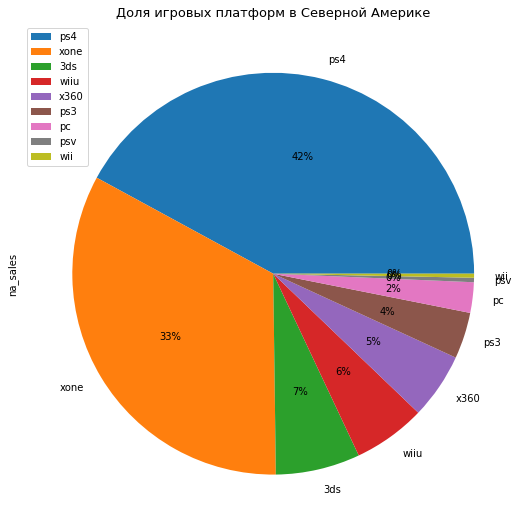

In [69]:
after_2017_region_na.plot.pie(autopct='%.0f%%', subplots=True, figsize=(9,10))
plt.title('Доля игровых платформ в Северной Америке', size=13);

In [70]:
after_2017_region_eu = after_2017.pivot_table(index = ['platform'], 
                                              values = 'eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending= False)
display(after_2017_region_eu.head(5)) 

,eu_sales
platform,
ps4,83.54
xone,28.10
pc,9.10
3ds,7.39
ps3,7.30


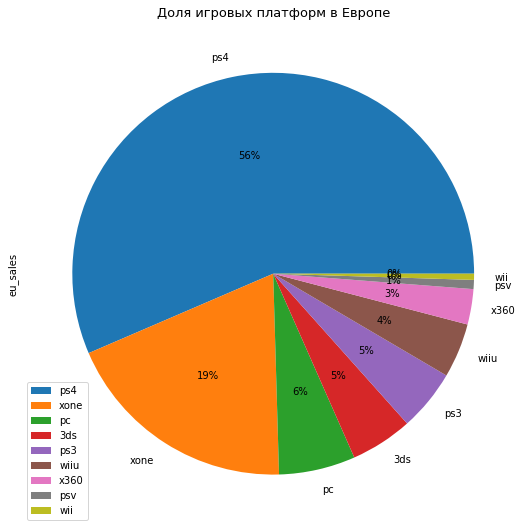

In [71]:
after_2017_region_eu.plot.pie(autopct='%.0f%%', subplots=True, figsize=(9,10))
plt.title('Доля игровых платформ в Европе', size=13);

In [72]:
after_2017_region_jp = after_2017.pivot_table(index = ['platform'], 
                                              values = 'jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending= False)
display(after_2017_region_jp.head(5)) 

,jp_sales
platform,
3ds,23.55
ps4,12.05
psv,8.41
ps3,4.97
wiiu,4.12


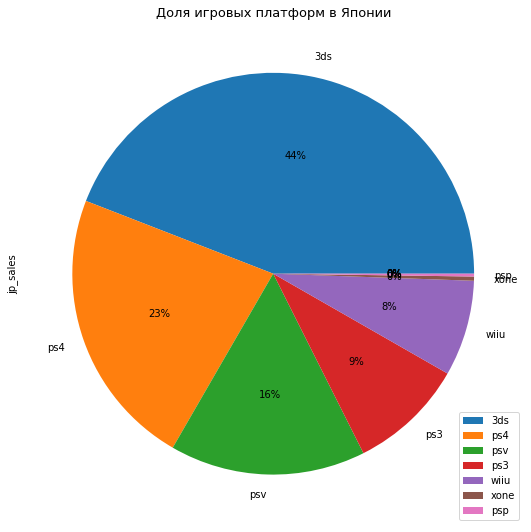

In [73]:
after_2017_region_jp.plot.pie(autopct='%.0f%%', subplots=True, figsize=(9,10))
plt.title('Доля игровых платформ в Японии', size=13);

Получили значения по основным игровым платформам по регионам.

Видим, что в регионе Северная Америка и Европа лидеры по платформам одинаковые - ps4 и xone, а в Японии 3ds и ps4.

### Самые популярные жанры (топ-5)

,eu_sales
genre,
shooter,40.28
action,34.82
sports,27.82
role-playing,17.21
racing,6.52


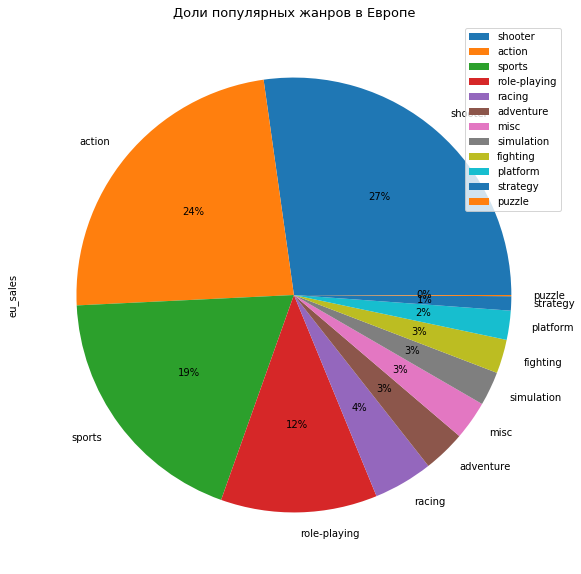

In [74]:
after_2017_genre_top5 = after_2017.pivot_table(index = ['genre'],
                                            values = 'eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending= False)
display(after_2017_genre_top5.head(5)) 
after_2017_genre_top5.plot.pie(autopct='%.0f%%', subplots=True, figsize=(10,10))
plt.title('Доли популярных жанров в Европе', size=13);

,jp_sales
genre,
action,23.05
role-playing,13.41
shooter,3.79
misc,3.19
adventure,2.22


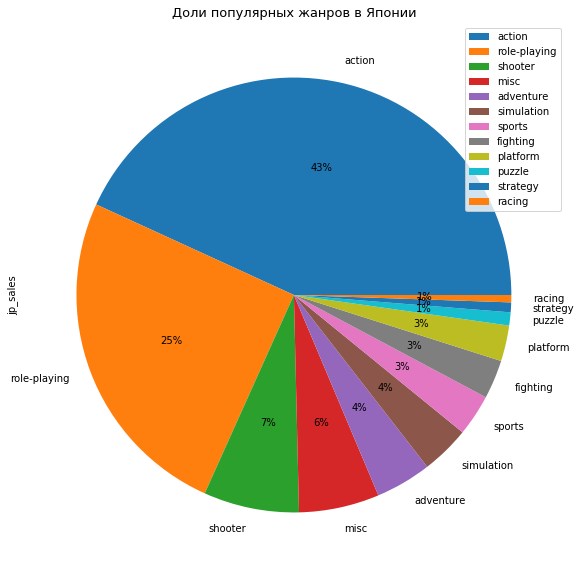

In [75]:
after_2017_genre_top5 = after_2017.pivot_table(index = ['genre'], 
                                            values = 'jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending= False)
display(after_2017_genre_top5.head(5)) 
after_2017_genre_top5.plot.pie(autopct='%.0f%%', subplots=True, figsize=(10,10))
plt.title('Доли популярных жанров в Японии', size=13);

,na_sales
genre,
shooter,48.18
action,33.68
sports,26.31
role-playing,19.82
misc,5.58


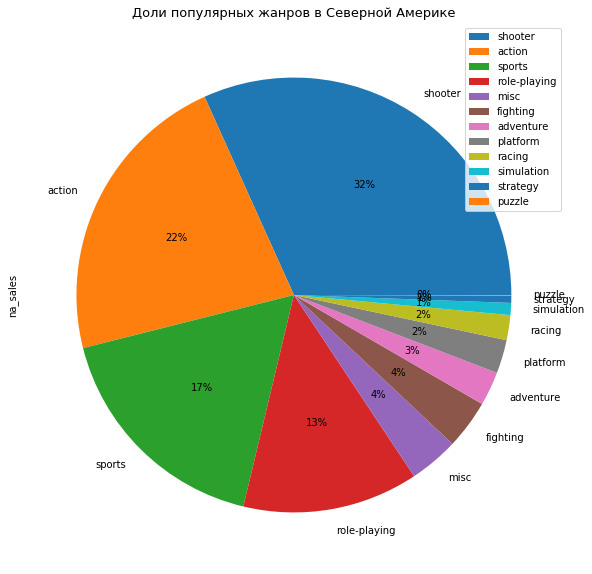

In [76]:
after_2017_genre_top5 = after_2017.pivot_table(index = ['genre'], 
                                            values = 'na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending= False)
display(after_2017_genre_top5.head(5)) 
after_2017_genre_top5.plot.pie(autopct='%.0f%%', subplots=True, figsize=(10,10))
plt.title('Доли популярных жанров в Северной Америке', size=13);

Изучили топ-5 жанров на игровых платформах.

Видим, что в регионе Северная Америка лидеры по жанрам shooter и action, в Европе лидеры по жанрам action и shooter, а в Японии action и role-playing.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Составим таблицу со значением рейтинга

,na_sales
rating,
m,47.03
no_rating,37.44
e,26.59
t,22.86
e10+,17.87


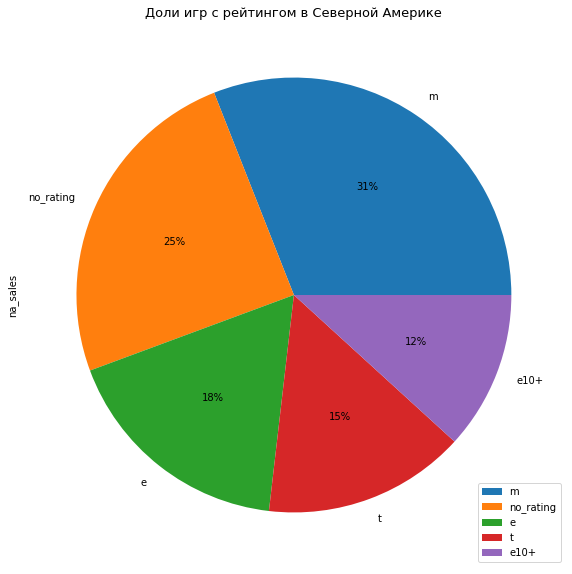

In [77]:
after_2017_esrb = after_2017.pivot_table(index = ['rating'], 
                                         values = 'na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending= False)
display(after_2017_esrb.head(5)) 
after_2017_esrb.plot.pie(autopct='%.0f%%', subplots=True, figsize=(10,10))
plt.title('Доли игр с рейтингом в Северной Америке', size=13);

,jp_sales
rating,
no_rating,32.89
t,7.70
e,5.25
m,4.29
e10+,3.27


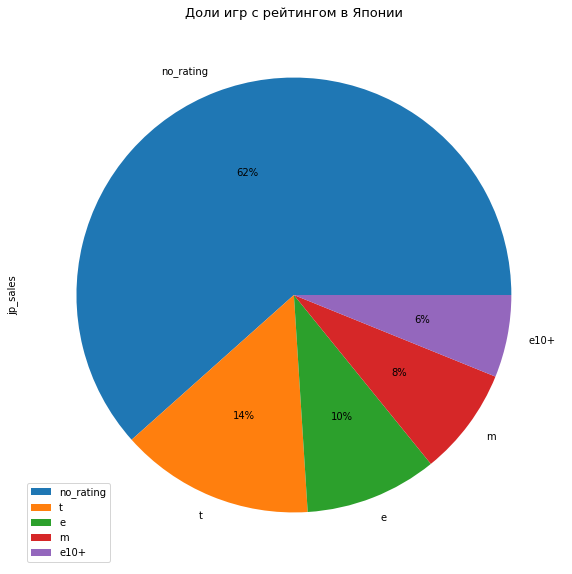

In [78]:
after_2017_esrb = after_2017.pivot_table(index = ['rating'], 
                                         values = 'jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending= False)
display(after_2017_esrb.head(5))
after_2017_esrb.plot.pie(autopct='%.0f%%', subplots=True, figsize=(10,10))
plt.title('Доли игр с рейтингом в Японии', size=13);

,eu_sales
rating,
m,45.54
no_rating,35.71
e,34.83
t,20.32
e10+,11.54


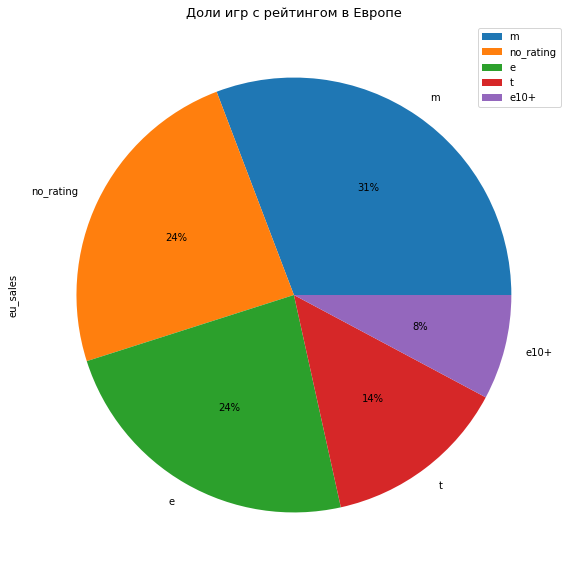

In [79]:
after_2017_esrb = after_2017.pivot_table(index = ['rating'], 
                                         values = 'eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending= False)
display(after_2017_esrb.head(5)) 
after_2017_esrb.plot.pie(autopct='%.0f%%', subplots=True, figsize=(10,10))
plt.title('Доли игр с рейтингом в Европе', size=13);

В рейтинге ESBR: 
    M - от 17 лет,
    E - для всех,
    T - подросткам 13—19 лет,
    E10+ - для всех старше 10 лет (http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya).
    
Видим, что в Северной Америке и Европе первое место занимают игры с отметкой "от 17 лет", а в Японии "подросткам 13—19 лет"

Опишем портрет пользователя по регионам.

- По продажам в Северной Америке лидируют игры на PS4 и Xone, жанрами shooter	и action, с ограничениями M - от 17 лет, no_rating и E - для всех.

- По продажам в Европе лидируют игры на PS4 и Xone, жанрами action и shooter, c ограничениями M - от 17 лет, no_rating и E - для всех.
 
- В Японии лидируют игры на 3ds и ps4, жанрами action и role-playing, с ограничениями no_rating, T - подросткам 13—19 лет и E - для всех.

## Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [80]:
after_2017_xbox = after_2017[(after_2017['platform'] == 'xone') & (after_2017['user_score'] !=-10)]
after_2017_pc = after_2017[(after_2017['platform'] == 'pc') & (after_2017['user_score'] !=-10)]

In [81]:
alpha = 0.05  # Показатель точности будет 95%, этого достаточно в этом случае.

results = st.ttest_ind(after_2017_xbox['user_score'], after_2017_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.

 - Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.
 - Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [82]:
after_2017_action = after_2017[(after_2017['genre'] == 'action') & (after_2017['user_score'] !=-10)]
after_2017_sports = after_2017[(after_2017['genre'] == 'sports') & (after_2017['user_score'] !=-10)]

In [83]:
alpha = 0.05  # Показатель точности будет 95%, этого достаточно в этом случае.

results = st.ttest_ind(after_2017_action['user_score'], after_2017_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


## Общий вывод

Проанализировали продажи игр для игровых платформ, с целью сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Выяснили, что для этой цели необходимо учитывать регион, в котором она будет запускаться. 

Для региона NA (Северная Америка) следует обратить внимание на:
- игровые платформы ps4 и one,
- жанры: shooter и action,
- рейтинг ESRB: с ограничениями M - от 17 лет, no_rating и E - для всех.

Для региона EU (Европа) следует обратить внимание на:
- игровые платформы ps4 и one,
- жанры: action и shooter,
- рейтинг ESRB: c ограничениями M - от 17 лет, no_rating и E - для всех.

Для региона JP (Япония) следует обратить внимание на:
- игровые платформы 3ds и ps4,
- жанры: action и role-playing,
- рейтинг ESRB: с ограничениями no_rating, T - подросткам 13—19 лет и E - для всех.

В ходе проверки гипотез выяснили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также средние пользовательские рейтинги жанров Action и Sports не одинаковые.

Посчитали корреляцию между суммарными продажами и оценкой пользователей - только на платформе WIIU, из всех рассмотреных, она оказалась: 0.3549869655260603, в то время как на остальных платформах такого влияния не оказывает.

Корреляция между суммарными продажами и оценкой критиков на всех рассмотренных игровых пллатформах выше 0.32567420650305284. 

## Чек-лист готовности проекта

Подготовка данных.
- [X]  открыт файл
- [X]  файл изучены (выведены первые строки, метод info())
- [X]  Замените названия столбцов (приведите к нижнему регистру)
- [X]  Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [X]  Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [X]  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Проведите исследовательский анализ данных.
- [X]  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [X]  Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [X]  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- [X]  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [X]  Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [X]  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [X]  Соотнесите выводы с продажами игр на других платформах.
- [X]  Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Составьте портрет пользователя каждого региона.
    Определите для пользователя каждого региона (NA, EU, JP):
- [X]  Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [X]  Самые популярные жанры (топ-5). Поясните разницу.
- [X]  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверка гипотез.
- [X]  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [X]  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Общий вывод.